# Demo of Robust PCA

In [19]:
import numpy as np
from imageio import imread
import matplotlib.pylab as plt
from RobustPCA.rpca import RobustPCA
from RobustPCA.spcp import StablePCP

In [5]:
'''Helper functions
'''
# function for ploting decomposition results
def plot_LS(data,L,S, clim=None, cmap = 'nipy_spectral'):
    fig, ax = plt.subplots(1,4, figsize=(16,4))
    ax0 = ax[0].imshow(data, cmap=plt.get_cmap(cmap))
    ax[0].set_title("Demo data M", fontsize = 16)
    if clim:
        ax0.set_clim(clim[0], clim[1])   
    ax1 = ax[1].imshow(L, cmap=plt.get_cmap(cmap))
    ax[1].set_title("Low rank matrix L", fontsize = 16)
    if clim:
        ax1.set_clim(clim[0], clim[1])  
    ax2 = ax[2].imshow(S, cmap=plt.get_cmap(cmap))
    ax[2].set_title("Sparse noise S", fontsize = 16)
    if clim:
        ax2.set_clim(clim[0], clim[1]) 
    ax3 = ax[3].imshow(data-L-S, cmap=plt.get_cmap(cmap))
    ax[3].set_title("Residuals: M-L-S", fontsize = 16)
    if clim:
        ax3.set_clim(clim[0], clim[1])

### Toy example
Here a made-up data is used to demostrating robust PCA. The generated synthetic matrix $M$, original low-rank matrix $L$, and sparse noise $S$ are shown below.

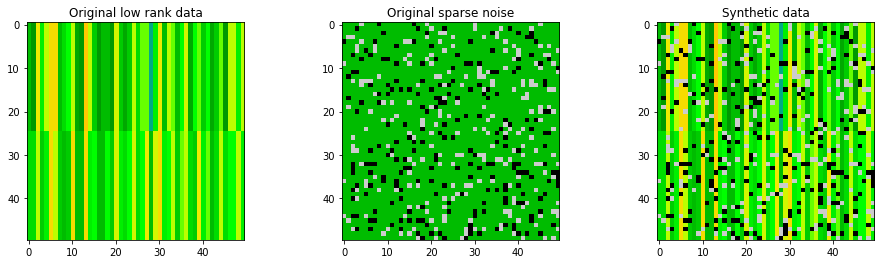

In [6]:
'''generate demo data
'''
np.random.seed(123)

# Low rank data
data_demo_lowrank = np.ones((50,50))*np.random.randint(10, size=(50))
data_demo_lowrank[0:25,:] = data_demo_lowrank[0:25,:]+ \
                            np.ones((25,50))*np.random.randint(low=-4,high=4, size=(50))

# Sparse (noise) data   
data_demo_sparse = - 100*np.random.binomial(1,0.1, size=2500).reshape([50,50])\
                   + 100*np.random.binomial(1,0.1, size=2500).reshape([50,50])
    
# Synthetic data M
data_demo = data_demo_lowrank + data_demo_sparse

# plot matrices
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax1 = ax[0].imshow(data_demo_lowrank, cmap=plt.get_cmap('nipy_spectral'))
ax2 = ax[1].imshow(data_demo_sparse, cmap=plt.get_cmap('nipy_spectral'))
ax3 = ax[2].imshow(data_demo, cmap=plt.get_cmap('nipy_spectral'))
ax1.set_clim([-20,20])
ax2.set_clim([-20,20])
ax3.set_clim([-20,20])
ax[0].set_title('Original low rank data');
ax[1].set_title('Original sparse noise');
ax[2].set_title('Synthetic data');

Here we can decompose $M$ with robust PCA and the result is shown below. Robust PCA did a great job to decompose the low rank matrix and sparse noise matrix.

In [7]:
# Robust PCA
rpca_demo = RobustPCA(tol = 0.000001)
rpca_demo.fit(data_demo)

# extract decomposed matrices
L_demo = rpca_demo.get_low_rank()
S_demo = rpca_demo.get_sparse()

Not converged!
Total error: 0.000002, allowed tolerance: 0.000001


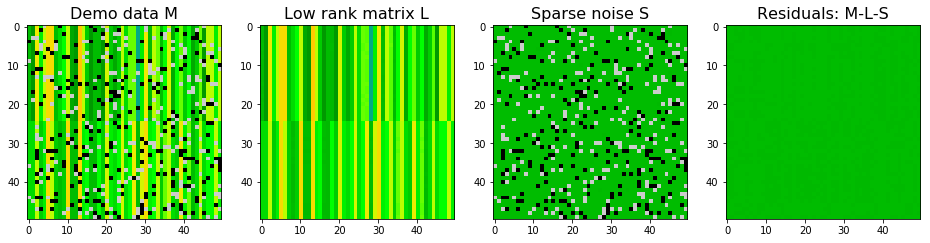

In [8]:
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

Here we can decompose $M$ with stable PCP and the result is shown below. Stable PCP also did a great job to decompose the low rank matrix and sparse noise matrix.

In [9]:
# Stable PCP
spcp_demo = StablePCP(tol=0.000001, sigma=0.0001, max_iter=1000)
spcp_demo.fit(data_demo)

# extract decomposed matrices
L_demo = spcp_demo.get_low_rank()
S_demo = spcp_demo.get_sparse()

Converged!


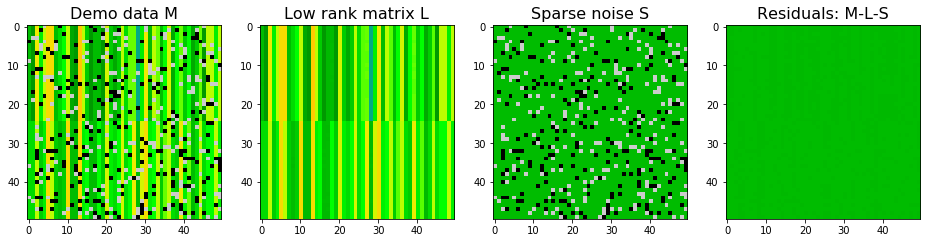

In [10]:
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

We can also add some Gaussian noise (dense noise $E$) to the synthetic data and see how two algorithms works. With Gaussian noise, stable PCP seems to give better approximations to true $L$ as shown in the SSE. For $S$, SSE is larger using stable PCP, however, stable PCP seems to be better in identifying sparse pixels. So stable PCP is more stable if there is a dense and non-ignorable noise background. Nevertheless, neither of them return a perfect decomposition. 

Notes:
* In robust PCA, the residual tolerance is a hyperparameter to tune when there is dense noise $E$.
* In stable PCP, the tolerance is not the residual tolerance, so it is better to set to be small. The hyperparameter is `sigma`, the estimated standard variation of the dense noise background.

In [11]:
# Adding Gaussian noise        
data_demo_G = data_demo + np.random.normal(size=(50,50))

Converged!
------------------------
Sum squared errors for low rank matrix: 1036.618285850976
Sum squared errors for Sparse matrix: 1348.731174204974
------------------------


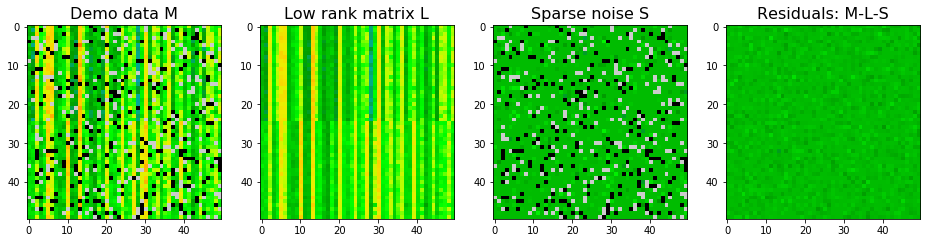

In [12]:
# Robust PCA
rpca_demo = RobustPCA(tol = 1000)
rpca_demo.fit(data_demo_G)
# extract decomposed matrices
L_demo = rpca_demo.get_low_rank()
S_demo = rpca_demo.get_sparse()
# plot decomposition for demo data
plot_LS(data_demo_G, L_demo, S_demo, clim=(-20,20))

print("------------------------")
print("Sum squared errors for low rank matrix:", np.sum((L_demo - data_demo_lowrank)**2))
print("Sum squared errors for Sparse matrix:", np.sum((S_demo - data_demo_sparse)**2))
print("------------------------")

Converged!
------------------------
Sum squared errors for low rank matrix: 1012.517225925545
Sum squared errors for Sparse matrix: 2253.2615466077405
------------------------


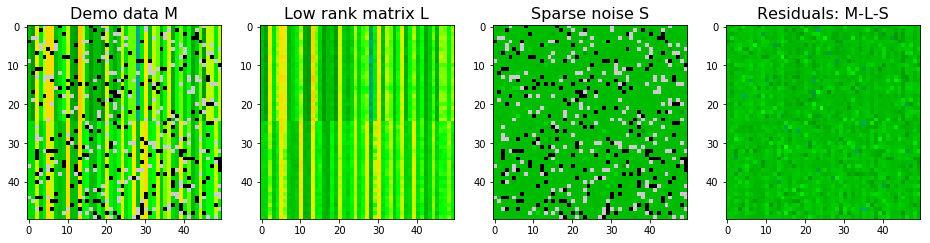

In [13]:
# Stable PCP
spcp_demo = StablePCP(tol=0.00001, sigma=1, max_iter=1000)
spcp_demo.fit(data_demo_G)

# extract decomposed matrices
L_demo = spcp_demo.get_low_rank()
S_demo = spcp_demo.get_sparse()
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

print("------------------------")
print("Sum squared errors for low rank matrix:", np.sum((L_demo - data_demo_lowrank)**2))
print("Sum squared errors for Sparse matrix:", np.sum((S_demo - data_demo_sparse)**2))
print("------------------------")

We can also limit the maximum rank for the low rank matrix. It seems stable PCP is silghtly better after limiting the maximum rank to be 2. The rank of $L$ from stabe PCP decomposition without limitation is 12. 

Converged!
------------------------
Sum squared errors for low rank matrix: 895.5860009625869
Sum squared errors for Sparse matrix: 1939.0716317633469
------------------------


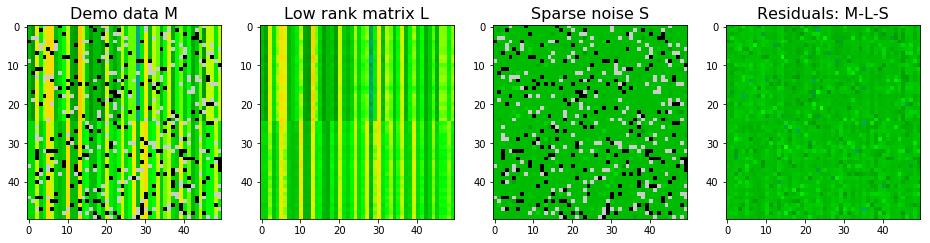

In [14]:
# Stable PCP
spcp_demo = StablePCP(tol=0.00001, sigma=1, max_iter=1000, max_rank=2)
spcp_demo.fit(data_demo_G)

# extract decomposed matrices
L_demo = spcp_demo.get_low_rank()
S_demo = spcp_demo.get_sparse()
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

print("------------------------")
print("Sum squared errors for low rank matrix:", np.sum((L_demo - data_demo_lowrank)**2))
print("Sum squared errors for Sparse matrix:", np.sum((S_demo - data_demo_sparse)**2))
print("------------------------")

### Example on an image

In [15]:
# read data
image = imread('./data/image1.jpg')

In [34]:
# Authors: Shun Chi (shunchi100@gmail.com)

import numpy as np
try:
    from fbpca import pca
except ModuleNotFoundError:
    print('\n install fbpca first: `pip install fbpca` \n')

class RobustPCA:
    """Robust principal component analysis (Robust PCA)

    Dimensionality reduction using alternating directions methods
    to decompose the input 2D matrix M into a lower rank dense 2D matrix L and sparse
    but not low-rank 2D matrix S.

    Parametersfbpca.pca
    ----------
    lamb : positive float
        Sparse component coefficient.
        if user doesn't set it:
            lamb = 1/sqrt(max(M.shape))
        A effective default value from the reference.

    mu : positive float
        Coefficient for augmented lagrange multiplier
        if user doesn't set it:
            n1, n2 = M.shape
            mu = n1*n2/4/norm1(M) # norm1(M) is M's l1-norm
        A effective default value from the reference.

    max_rank : positive int
        The maximum rank allowed in the low rank matrix
        default is None --> no limit to the rank of the low
        rank matrix.

    tol : positive float
        Convergence tolerance

    max_iter : positive int
        Maximum iterations for alternating updates

    use_fbpca : bool
        Determine if use fbpca for SVD. fbpca use Fast Randomized SVDself.
        default is False

    fbpca_rank_ratio : float, between (0, 1]
        If max_rank is not given, this sets the rank for fbpca.pca()
        fbpca_rank = int(fbpca_rank_ratio * min(M.shape))

    Attributes:
    -----------
    L : 2D array
            Lower rank dense 2D matrix

    S : 2D array
        Sparse but not low-rank 2D matrix

    converged : bool
        Flag shows if the fit is converged or not


    Reference:
    ----------
    `Emmanuel J. Candes, Xiaodong Li, Yi Ma, and John Wright`
    "Robust Principal Component Analysis?"
    https://statweb.stanford.edu/~candes/papers/RobustPCA.pdf

    """

    def __init__(self, lamb=None, mu=None, max_rank=None, tol=1e-6, max_iter=100, use_fbpca=False, fbpca_rank_ratio=0.2):
        self.lamb = lamb
        self.mu = mu
        self.max_rank = max_rank
        self.tol = tol
        self.max_iter = max_iter
        self.use_fbpca = use_fbpca
        self.fbpca_rank_ratio = fbpca_rank_ratio
        self.converged = None

    def s_tau(self, X, tau):
        """Shrinkage operator
            Sτ [x] = sign(x) max(|x| − τ, 0)

        Parameters
        ----------
        X : 2D array
            Data for shrinking

        tau : positive float
            shrinkage threshold

        Returns
        -------
        shirnked 2D array
        """

        return np.sign(X)*np.maximum(np.abs(X)-tau,0)


    def d_tau(self, X):
        """Singular value thresholding operator
            Dτ (X) = USτ(Σ)V∗, where X = UΣV∗

        Parameters
        ----------
        X : 2D array
            Data for shrinking

        Returns
        -------
        thresholded 2D array
        """

        # singular value decomposition
        if self.use_fbpca:
            if self.max_rank:
                (u, s, vh) = pca(X, self.max_rank, True, n_iter = 5)
            else:
                (u, s, vh) = pca(X, int(np.min(X.shape)*self.fbpca_rank_ratio), True, n_iter = 5)
        else:
            u, s, vh = np.linalg.svd(X, full_matrices=False)

        # Shrinkage of singular values
        tau = 1.0/self.mu
        s = s[s>tau] - tau
        rank = len(s)

        if self.max_rank:
            if rank > self.max_rank:
                s = s[0:self.max_rank]
                rank = self.max_rank*1

        # reconstruct thresholded 2D array
        return  np.dot(u[:, 0:rank] * s, vh[0:rank,:]), rank



    def fit(self, M):
        """Robust PCA fit

        Parameters
        ----------
        M : 2D array
            2D array for docomposing

        Returns
        -------
        L : 2D array
            Lower rank dense 2D matrix

        S : 2D array
            Sparse but not low-rank 2D matrix
        """

        size = M.shape

        # initialize S and Y (Lagrange multiplier)
        S = np.zeros(size)
        Y = np.zeros(size)

        # if lamb and mu are not set, set with default values
        if self.mu==None:
            self.mu = np.prod(size)/4.0/np.sum(np.abs(M))
        if self.lamb==None:
            self.lamb = 1/np.sqrt(np.max(size))

        # Alternating update
        for i in range(self.max_iter):
            L, rank = self.d_tau(M-S+1.0/self.mu*Y)
            S = self.s_tau(M-L+1.0/self.mu*Y, self.lamb/self.mu)

            # Calculate residuals
            residuals = M-L-S
            residuals_sum = np.sum(np.abs(residuals))

            # Check convergency
            if residuals_sum <= self.tol:
                break

            Y = Y + self.mu*residuals

        # Check if the fit is converged
        if residuals_sum > self.tol:
            print('Not converged!')
            print('Total error: %f, allowed tolerance: %f'%(residuals_sum, self.tol))
            self.converged = False
        else:
            print('Converged!')
            self.converged = True

        self.L, self.S, self.rank = L, S, rank

    def get_low_rank(self):
        '''Return the low rank matrix

        Returns:
        --------
        L : 2D array
            Lower rank dense 2D matrix
        '''
        return self.L

    def get_sparse(self):
        '''Return the sparse matrix

        Returns:
        --------
        S : 2D array
            Sparse but not low-rank 2D matrix
        '''
        return self.S

    def get_rank(self):
        '''Return the rank of low rank matrix

        Returns:
        rank : int
            The rank of low rank matrix
        '''
        return self.rank


In [32]:
image.shape

(512, 512, 3)

In [33]:
int(np.min(image[:,:,0].shape)*0.2)

102

In [ ]:
import time
time1 = time.time()
# robust PCA
rpca = RobustPCA(tol = 1, max_iter=1000, use_fbpca=True, fbpca_rank_ratio = 0.5)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()
print(time.time()-time1)

Not converged!
Total error: 25346.050676, allowed tolerance: 1.000000
Not converged!
Total error: 24410.845468, allowed tolerance: 1.000000


Text(0.5,1,'Sparse matrix S')

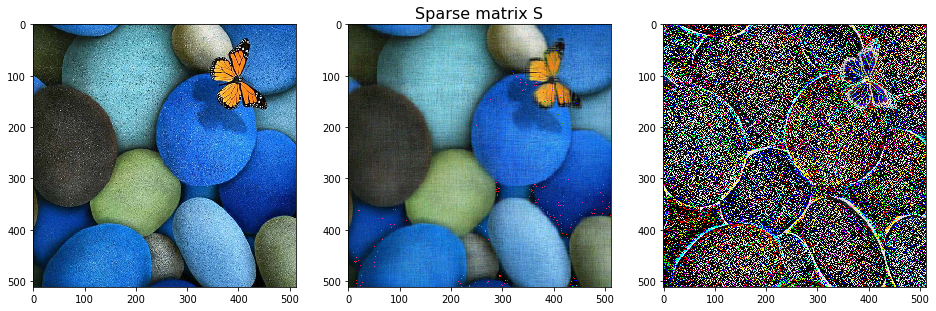

In [26]:
# show results
fig, ax = plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(image)
ax[1].set_title("Original image", fontsize = 16)
ax[1].imshow(L_image)
ax[1].set_title("Low rank matrix L", fontsize = 16)
ax[2].imshow(S_image)
ax[1].set_title("Sparse matrix S", fontsize = 16)

In [262]:
# robust PCA with a max rank
rpca = RobustPCA(tol = 1, max_rank=10, max_iter=1000)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 38664.184151, allowed tolerance: 1.000000
Not converged!
Total error: 60738.568103, allowed tolerance: 1.000000
Not converged!
Total error: 14904.953990, allowed tolerance: 1.000000


Text(0.5,1,'Sparse matrix S')

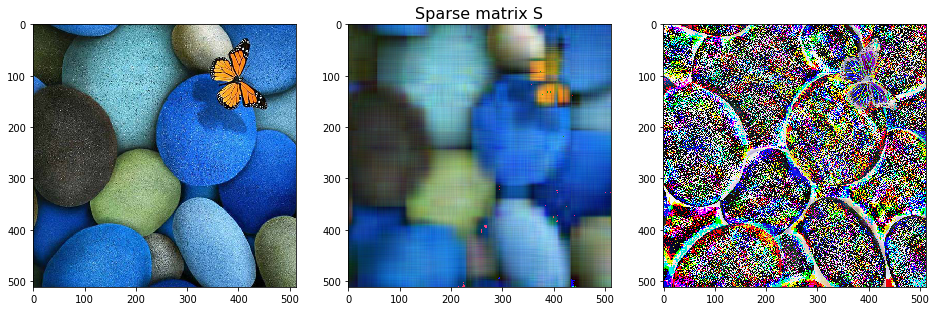

In [263]:
fig, ax = plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(image)
ax[1].set_title("Original image", fontsize = 16)
ax[1].imshow(L_image)
ax[1].set_title("Low rank matrix L", fontsize = 16)
ax[2].imshow(S_image)
ax[1].set_title("Sparse matrix S", fontsize = 16)

### Seperate foreground and background

In [272]:
import skvideo.io  
videodata = skvideo.io.vread("./data/gangnamstyle.mp4")  
print(videodata.shape)

(90, 1080, 1920, 3)


In [273]:
videodata = videodata[:,::2,::2,:].reshape(90, 540*960,3)
videodata.shape

(90, 518400, 3)

In [275]:
# robust PCA
rpca = RobustPCA(max_iter=200)

L_video = videodata*0
S_video = videodata*0

for i in range(3):
    rpca.fit(videodata[:,:,i])
    L_video[:,:,i] = rpca.get_low_rank()
    S_video[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 6121.494911, allowed tolerance: 0.000001
Not converged!
Total error: 5390.150390, allowed tolerance: 0.000001
Not converged!
Total error: 5243.001109, allowed tolerance: 0.000001


In [276]:
# robust PCA
rpca = RobustPCA(max_iter=200, max_rank=1)

L_video_r1 = videodata*0
S_video_r1 = videodata*0

for i in range(3):
    rpca.fit(videodata[:,:,i])
    L_video_r1[:,:,i] = rpca.get_low_rank()
    S_video_r1[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 133.569109, allowed tolerance: 0.000001
Not converged!
Total error: 97.247399, allowed tolerance: 0.000001
Not converged!
Total error: 118.734362, allowed tolerance: 0.000001


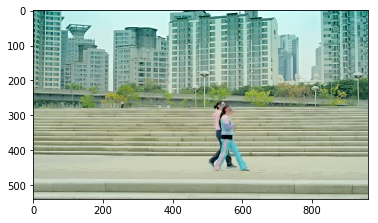

In [278]:
plt.imshow(videodata[0,:,:].reshape(1,540,960,3).squeeze())

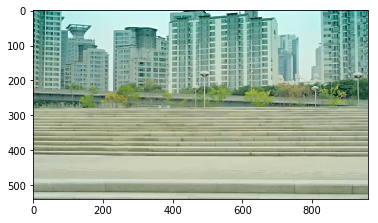

In [279]:
plt.imshow(L_video[0,:,:].reshape(1,540,960,3).squeeze())

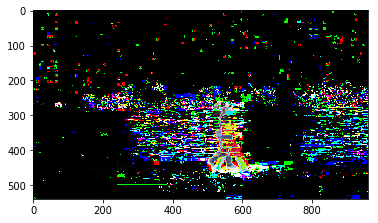

In [290]:
plt.imshow((videodata-L_video_r1)[1,:,:].reshape(1,540,960,3).squeeze())

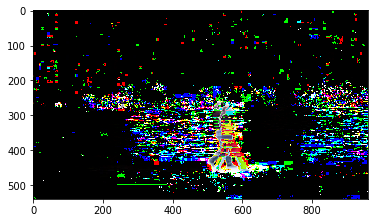

In [282]:
plt.imshow(S_video_r1[0,:,:].reshape(1,540,960,3).squeeze())

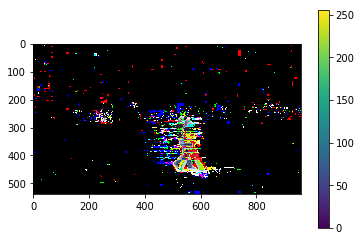

In [284]:
plt.imshow(S_video[0,:,:].reshape(1,540,960,3).squeeze())
plt.colorbar()

In [288]:
np.min(S_video[0,:,:])

0

In [289]:
# robust PCA
spcp = StablePCP(max_iter=200)

L_video_spcp = videodata*0
S_video_spcp = videodata*0

for i in range(3):
    spcp.fit(videodata[:,:,i])
    L_video_spcp[:,:,i] = spcp.get_low_rank()
    S_video_spcp[:,:,i] = spcp.get_sparse()

Not converged within 200 iterations!
Total error: 0.484749, allowed tolerance: 0.000001
Not converged within 200 iterations!
Total error: 0.443124, allowed tolerance: 0.000001
Not converged within 200 iterations!
Total error: 0.658743, allowed tolerance: 0.000001


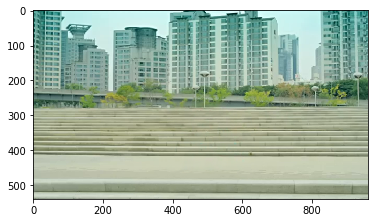

In [291]:
plt.imshow(L_video_spcp[0,:,:].reshape(1,540,960,3).squeeze())

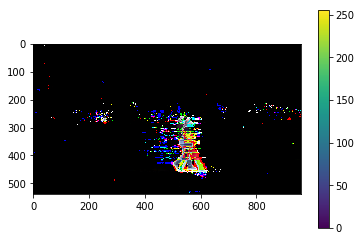

In [292]:
plt.imshow(S_video_spcp[0,:,:].reshape(1,540,960,3).squeeze())
plt.colorbar()

In [ ]:
tmp = S_video_spcp[30,:,:].copy()
tmp[S_video_spcp[30,:,:]>0] = S_video_spcp[30,:,:][S_video_spcp[30,:,:]>0]+L_video_spcp[30,:,:][S_video_spcp[30,:,:]>0]
plt.figure(figsize=(10,10))
plt.imshow(tmp.reshape(540,960,3).squeeze())
plt.colorbar()

In [294]:
videodata.dtype

dtype('uint8')

In [299]:
# robust PCA
videodata=videodata/255.0
rpca2 = RobustPCA(max_iter=1, mu = 0)

L_video = videodata*0
S_video = videodata*0

for i in range(3):
    rpca.fit(videodata[:,:,i])
    L_video[:,:,i] = rpca.get_low_rank()
    S_video[:,:,i] = rpca.get_sparse()

KeyboardInterrupt: 